In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [3]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [4]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [5]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

In [ ]:
df.sample(5)

In [6]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
32484,32485,45,admin.,casado,secundaria/superiores,no,857,si,no,movil,169,21-nov-2021,1,92,20,otro,no
34848,34849,40,blue-collar,casado,secundaria/superiores,no,384,no,si,movil,142,30-jul-2021,3,-1,0,Sin Información,no
44143,44144,29,services,soltero,secundaria/superiores,no,-142,si,no,Sin Información,140,16-may-2021,1,-1,0,Sin Información,no


In [7]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
2957,28,admin.,casado,secundaria/superiores,no,17,si,no,movil,269,1,-1,0,Sin Información,no
31033,31,admin.,soltero,secundaria/superiores,no,320,si,no,movil,376,2,-1,0,Sin Información,no
6387,45,unemployed,casado,universitarios,no,1148,no,no,movil,782,2,-1,0,Sin Información,no


In [8]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 39)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si
40833,34,649,124,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
16385,33,8097,500,2,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
19816,30,2351,91,13,-1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
23182,40,-275,219,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9531,58,565,153,1,93,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
df_train.columns

Index(['edad', 'saldo', 'duracion', 'campaign', 'tiempo_transcurrido',
       'contactos_anteriores', 'trabajo_admin.', 'trabajo_blue-collar',
       'trabajo_entrepreneur', 'trabajo_housemaid', 'trabajo_management',
       'trabajo_retired', 'trabajo_self-employed', 'trabajo_services',
       'trabajo_student', 'trabajo_technician', 'trabajo_unemployed',
       'trabajo_unknown', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_soltero', 'educacion_primaria',
       'educacion_secundaria/superiores', 'educacion_universitarios',
       'deuda_no', 'deuda_si', 'vivienda_no', 'vivienda_si', 'prestamo_no',
       'prestamo_si', 'tipo_contacto_Sin Información', 'tipo_contacto_fijo',
       'tipo_contacto_movil', 'resultado_campanas_anteriores_Sin Información',
       'resultado_campanas_anteriores_exito',
       'resultado_campanas_anteriores_otro',
       'resultado_campanas_anteriores_sin_exito', 'target_no', 'target_si'],
      dtype='object')

In [11]:
# Estandarización controlada
dades=df_train.drop(columns=['target_no', 'target_si'],inplace=False)
estandarizador = StandardScaler()
dades_std=estandarizador.fit_transform(dades)

**CLUSTER**

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Suponiendo que tienes tu DataFrame llamado 'df' con 50000 personas y diferentes columnas

# # Separar las características categóricas y numéricas
# categorical_features = df_train.select_dtypes(include=['object']).columns
# numeric_features = df_train.select_dtypes(include=['int', 'float']).columns

# # Construir el preprocesamiento de datos con codificación one-hot para características categóricas
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(), categorical_features)])

# # Crear el pipeline de preprocesamiento y modelado
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('kmeans', KMeans(n_clusters=5, random_state=42))])

# # Ajustar el pipeline al DataFrame
# pipeline.fit(df_train)

# # Obtener las etiquetas de los clústeres asignadas a cada muestra
# cluster_labels = pipeline.named_steps['kmeans'].labels_

# # Agregar las etiquetas de los clústeres al DataFrame original
# df_train['Cluster'] = cluster_labels

# # Analizar los resultados del clustering
# print(df_train['Cluster'].value_counts())

In [12]:
k_means = KMeans (n_clusters=5, random_state=42)

df_train['Grupos'] = k_means.fit_predict(dades_std)

In [13]:
df_train['Grupos'].value_counts()

Grupos
0    14133
2    12388
1     7276
4     5627
3     3022
Name: count, dtype: int64

In [15]:
df_train[df_train['Grupos'] == 4]

,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si,Grupos
4,56,217,121,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
6,24,1085,95,6,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
9,38,258,587,2,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
20,49,-478,291,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
35,46,78,145,1,-1,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42384,41,-1176,81,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
42387,48,2697,79,5,-1,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
42432,46,8017,169,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
42437,31,236,211,3,-1,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4


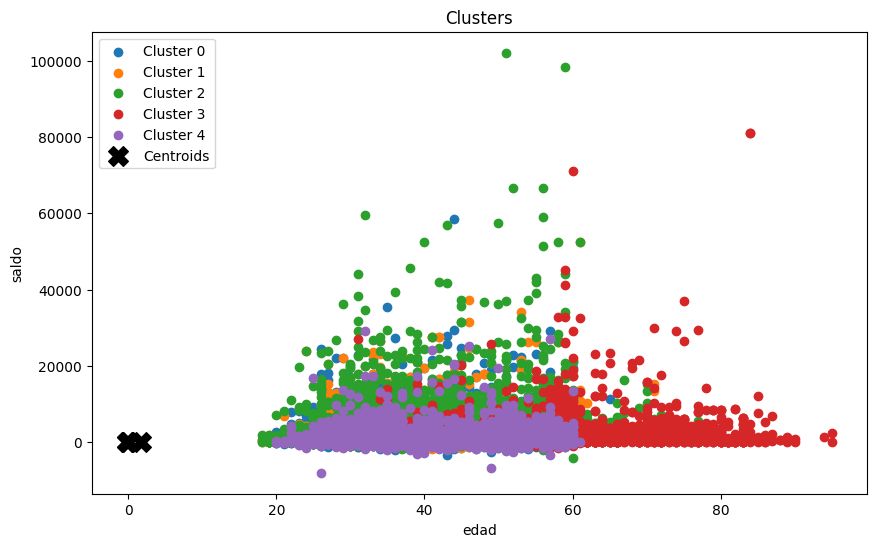

In [14]:
numero_clusters = 5
plt.figure(figsize=(10, 6))
for cluster in range(numero_clusters):
    cluster_data = df_train[df_train['Grupos'] == cluster]
    plt.scatter(cluster_data['edad'], cluster_data['saldo'], label=f'Cluster {cluster}')
plt.scatter(k_means.cluster_centers_[:, 9], k_means.cluster_centers_[:, 8], s=200, c='black', marker='X', label='Centroids')

plt.title('Clusters')
plt.xlabel('edad')
plt.ylabel('saldo')
plt.legend()
plt.show()

- A partir de este 'markdown' se tiene que cambiar todas las celdas a otro notebook porque no valen para este caso

In [ ]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train.drop('Cluster', axis=1))

# Visualizar los resultados del clustering en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_train['edad'], df_train['saldo'], c=df_train['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Resultados del Clustering')
plt.xlabel('edad')
plt.ylabel('saldo')
plt.colorbar(label='Cluster')
plt.show()



In [ ]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train.drop('Cluster', axis=1))

# Visualizar los resultados del clustering en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_train['Cluster'], cmap='tab10', alpha=0.8, edgecolor='k', linewidth=0.5)
plt.title('Resultados del Clustering (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.xlim(df_pca[:, 0].min() - 0.1, df_pca[:, 0].max() + 0.1)  # Ajustar límites de eje x
plt.ylim(df_pca[:, 1].min() - 0.1, df_pca[:, 1].max() + 0.1)  # Ajustar límites de eje y
plt.grid(True, linestyle='--', alpha=0.5)  # Agregar cuadrícula de fondo
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns

# Calcular estadísticas descriptivas para cada grupo
cluster_stats = df.groupby('Cluster').describe()

# Visualizar las distribuciones de características en cada grupo
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

# Imprimir estadísticas descriptivas
print(cluster_stats)


In [ ]:
# Suponiendo que ya has asignado etiquetas de cluster al DataFrame df

# Dividir el DataFrame en subconjuntos para cada grupo de cluster
grupos = {}
for grupo, datos_grupo in df.groupby('Cluster'):
    grupos[grupo] = datos_grupo.copy()  # Copia los datos para evitar modificar el DataFrame original

# Visualizar los primeros registros de cada grupo
for grupo, datos_grupo in grupos.items():
    print(f"Grupo {grupo}:")
    print(datos_grupo.head())
    print("\n")


In [ ]:
from sklearn.decomposition import PCA

# Suponiendo que ya has asignado etiquetas de cluster al DataFrame df

# Aplicar PCA para reducir la dimensionalidad de los datos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['Clusters']))  # Excluye la columna del clúster

# Visualizar los datos en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for grupo, datos_grupo in grupos.items():
    indices_grupo = datos_grupo.index
    plt.scatter(X_pca[indices_grupo, 0], X_pca[indices_grupo, 1], label=f"Grupo {grupo}", alpha=0.5)
plt.title('Visualización de Grupos del Clúster (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()